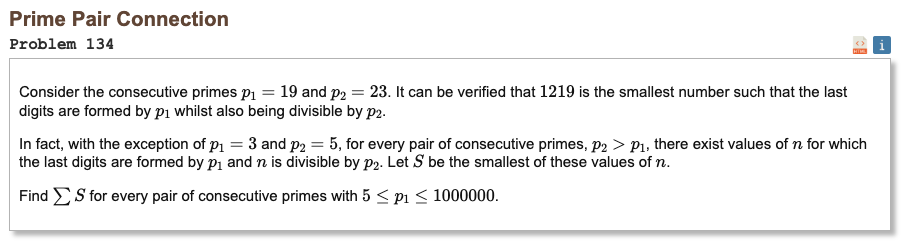

## Initial approach

* generate primes up to at least two million to cover p2 after p1 < 1 million
* for each consecutive pair p1 < 1 million and next prime p2 skip p1 in {2, 5}
* let k be digit count of p1 and set M = 10^k
* solve M x ≡ −p1 (mod p2) using modular inverse of M modulo p2
* take x = ((−p1) * inv(M mod p2, p2)) mod p2 as the minimal solution
* construct S(p1, p2) = x * M + p1 so it ends with digits of p1 and is divisible by p2
* sum S(p1, p2) over all consecutive prime pairs with p1 < 1 million

In [1]:
def sieve(limit):
    is_prime = [True] * (limit + 1)
    is_prime[0] = is_prime[1] = False
    for i in range(2, int(limit**0.5) + 1):
        if is_prime[i]:
            for j in range(i*i, limit + 1, i):
                is_prime[j] = False
    return [i for i, v in enumerate(is_prime) if v]

limit = 10**6
primes = sieve(limit + 1000)
total = 0

for i in range(len(primes) - 1):
    p1 = primes[i]
    p2 = primes[i + 1]
    if p1 <= 5:
        continue
    d = len(str(p1))
    mod = pow(10, d, p2)
    inv = pow(mod, -1, p2)
    k = (-p1 * inv) % p2
    N = p1 + k * 10**d
    total += N

print("Result:", total)

Result: 18964843277652775
